#Dhermendra Kumar Tiwari
#GO_STP_3831

#Task-11

Predict Loan Eligibility for Dream Housing Finance company

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [155]:
df = pd.read_csv('Loan.csv')
df.head(15)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [156]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [157]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [158]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [159]:
df.ndim

2

In [160]:
df.corr

<bound method DataFrame.corr of       Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002    Male      No  ...            1.0         Urban           Y
1    LP001003    Male     Yes  ...            1.0         Rural           N
2    LP001005    Male     Yes  ...            1.0         Urban           Y
3    LP001006    Male     Yes  ...            1.0         Urban           Y
4    LP001008    Male      No  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           Y
610  LP002979    Male     Yes  ...            1.0         Rural           Y
611  LP002983    Male     Yes  ...            1.0         Urban           Y
612  LP002984    Male     Yes  ...            1.0         Urban           Y
613  LP002990  Female      No  ...            0.0     Semiurban           N

[614 rows x 13 columns]>

In [161]:
df.index

RangeIndex(start=0, stop=614, step=1)

In [162]:
df.shape

(614, 13)

In [163]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [164]:
df.tail(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
603,LP002958,Male,No,0,Graduate,No,3676,4301.0,172.0,360.0,1.0,Rural,Y
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y


In [165]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [166]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [167]:
df.Loan_Amount_Term	.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [168]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [169]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [170]:
df.LoanAmount.value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [171]:
df.CoapplicantIncome.value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [172]:
df.ApplicantIncome.value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [173]:
df.LoanAmount = df.LoanAmount*1000

In [174]:
df.Loan_Status.value_counts(normalize = True).reset_index()

,index,Loan_Status
0,Y,0.687296
1,N,0.312704


In [175]:
df = df.drop(columns=['Loan_ID'])
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
df.groupby('Loan_Status').count()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
N,187,192,186,192,183,192,192,181,186,179,192
Y,414,419,413,422,399,422,422,411,414,385,422


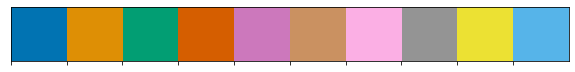

In [176]:
current_palette = sns.color_palette('colorblind')
sns.palplot(current_palette)

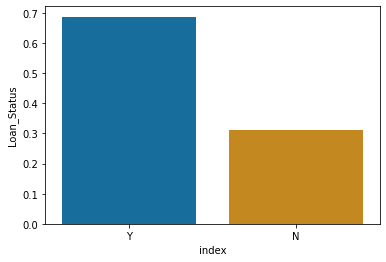

In [177]:

sns.barplot(data = df.Loan_Status.value_counts(normalize = True).reset_index(),
            x = 'index',
            y = 'Loan_Status',
            palette=current_palette)

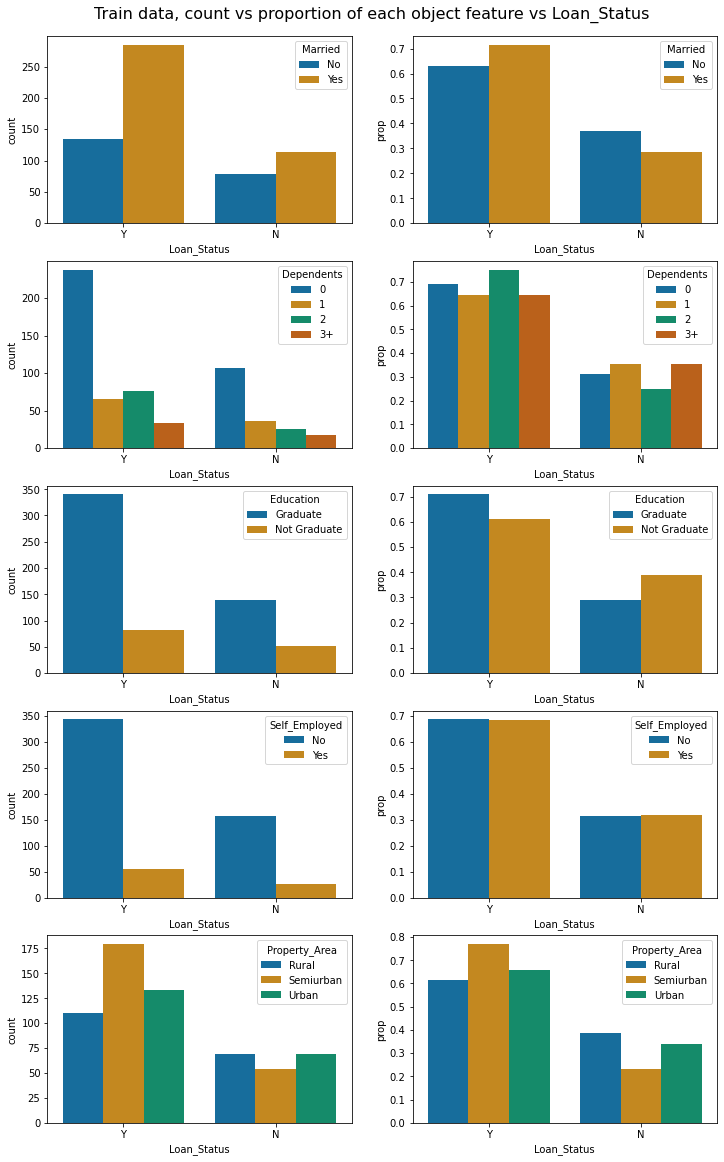

In [178]:
def prop_check(data):
    f, axes = plt.subplots(5,2,figsize= (12,20))
    plt.suptitle('Train data, count vs proportion of each object feature vs Loan_Status', size =16, y = 0.9)
    col = data.columns[1:data.shape[1]-1]
    r = 0
    for i in col:
        if (data.dtypes == 'object')[i]:        
            data_prop = (data['Loan_Status']
                          .groupby(data[i])
                          .value_counts(normalize = True)
                          .rename('prop')
                          .reset_index())
            sns.countplot(data = data, 
                          x ='Loan_Status', 
                          hue = i, 
                          ax = axes[r,0], 
                          hue_order=data_prop[i].unique(), 
                          palette=current_palette)
            sns.barplot(data = data_prop, 
                        x = 'Loan_Status', 
                        y = 'prop',
                        hue = i,
                        ax = axes[r,1],
                        palette=current_palette)
            r = r+1
prop_check(df)

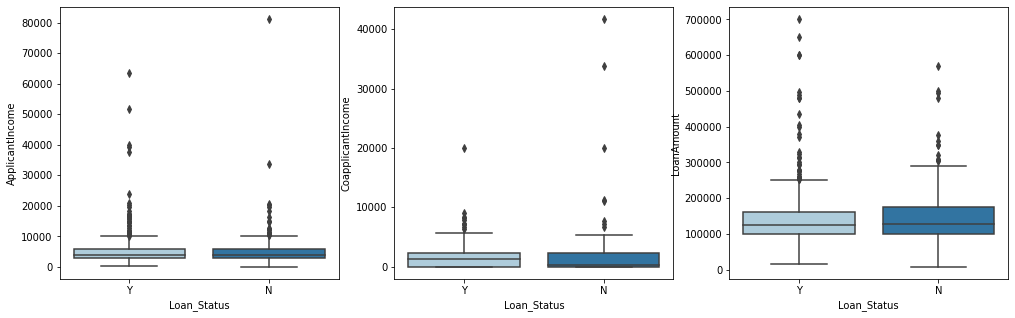

In [181]:
sns.set_palette("Paired")
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
  sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])
plt.subplots_adjust(hspace=1)

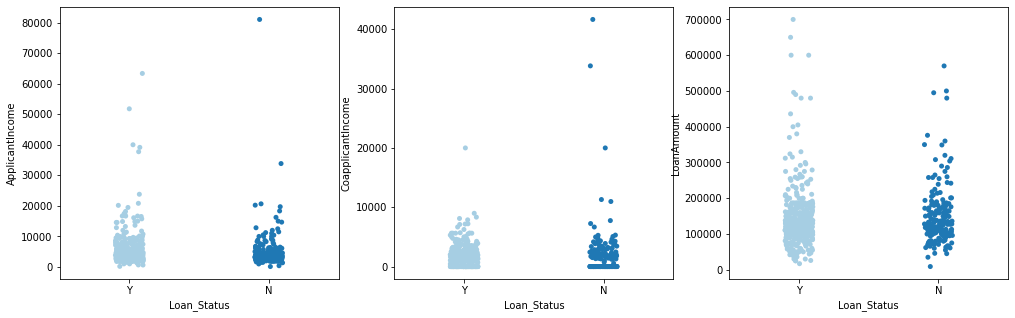

In [182]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
  sns.stripplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])
plt.subplots_adjust(hspace=1)

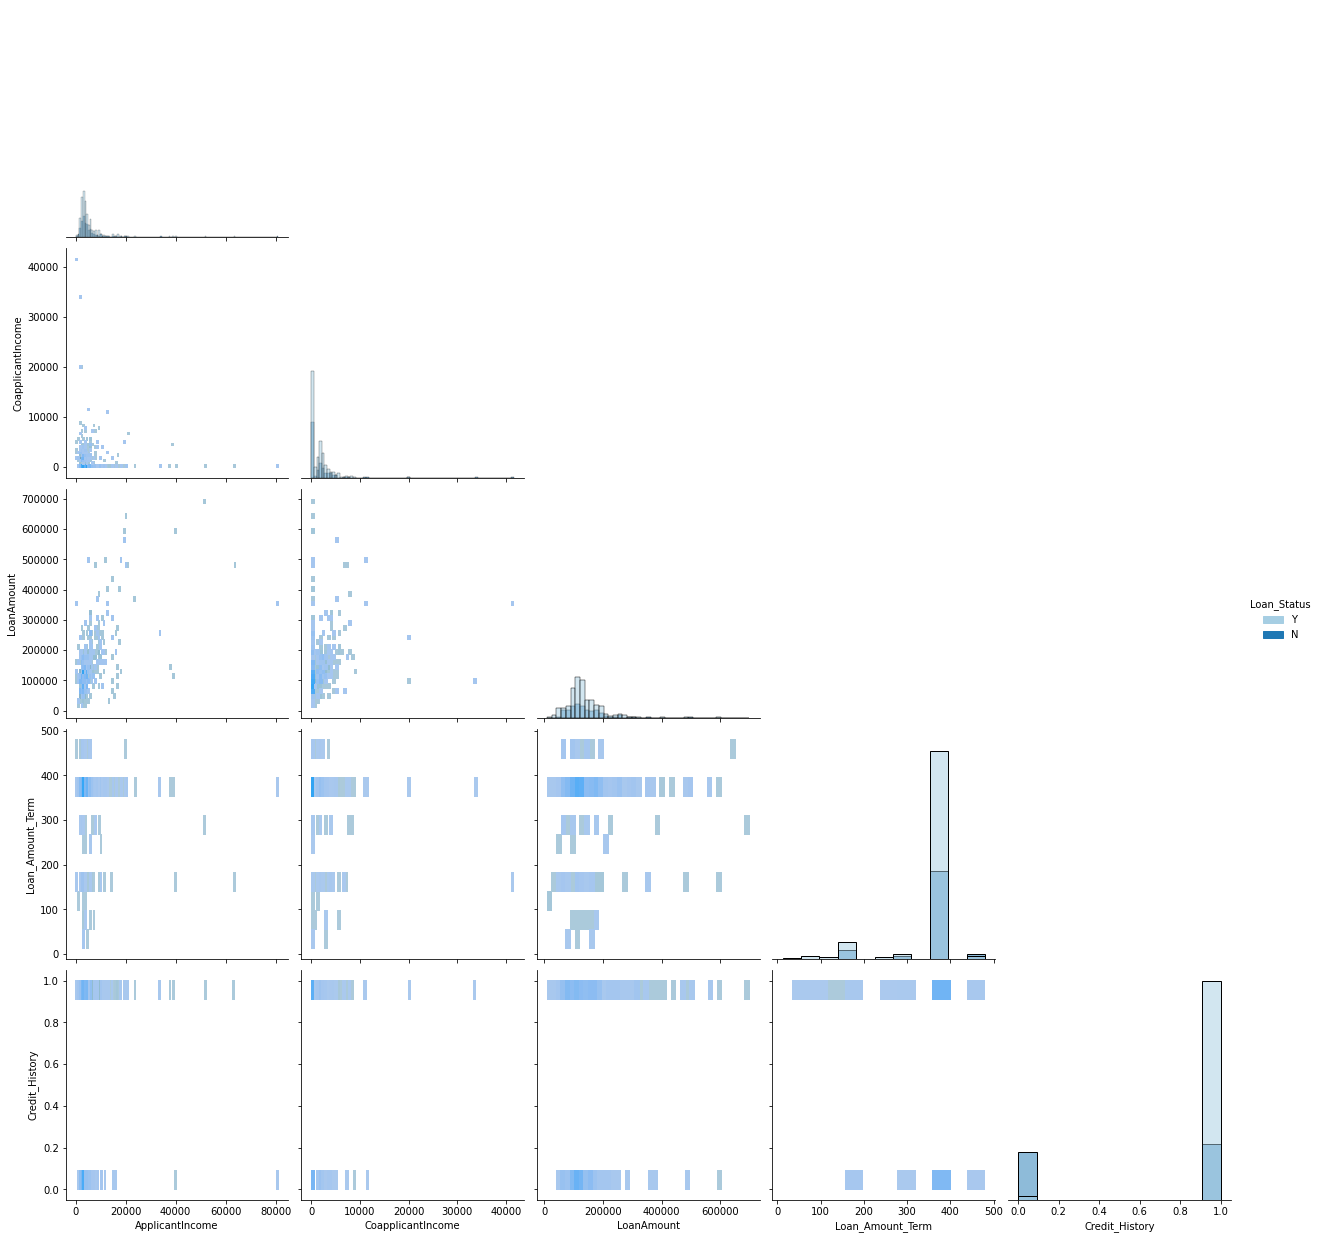

In [183]:
sns.pairplot(df,hue='Loan_Status',corner=True,height=3.5,kind='hist')
plt.show()

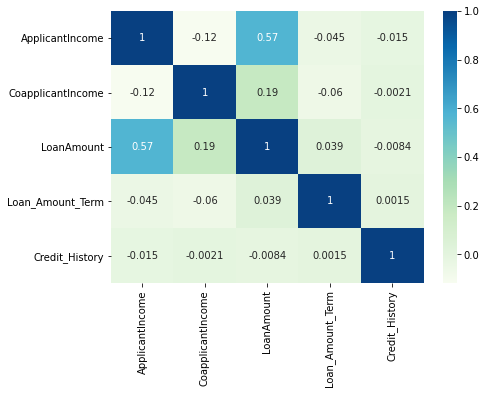

In [193]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True,cmap='GnBu')

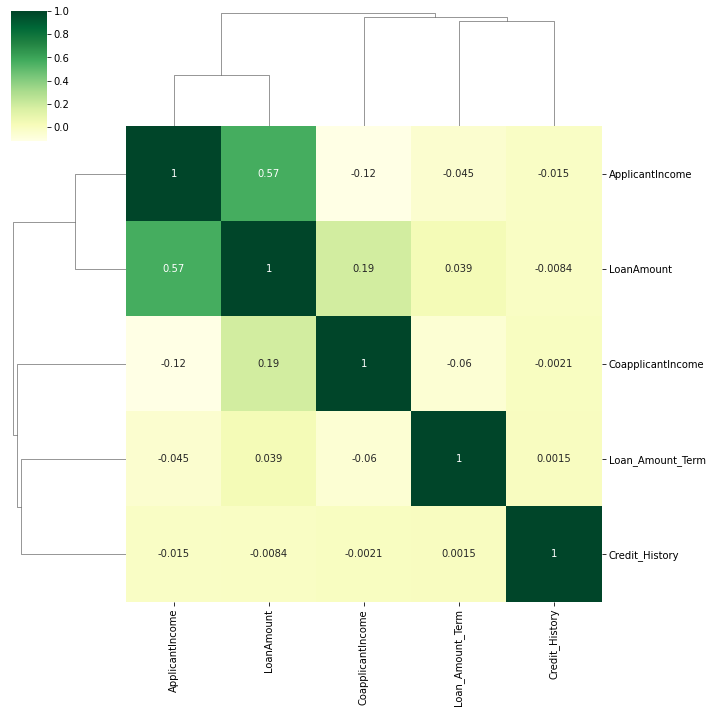

In [194]:
sns.clustermap(df.corr(),annot=True,cmap='YlGn')

In [196]:


df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128000.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66000.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120000.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141000.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [197]:
X = df_encoded.drop(columns='Loan_Status_Y')
y = df_encoded['Loan_Status_Y']

In [198]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify
=y,random_state =42)


In [199]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)

In [200]:
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)

In [202]:
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))

Training Data Set Accuracy:  1.0


In [203]:
print("Training Data F1 Score ", f1_score(y_train,y_pred))

Training Data F1 Score  1.0


In [205]:
print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())

Validation Mean F1 Score:  0.6558267011390936


In [207]:
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Validation Mean Accuracy:  0.7046382189239332


[Text(153.45000000000002, 190.26, 'X[4] <= 0.425\ngini = 0.431\nsamples = 491\nvalue = [154, 337]'),
 Text(83.7, 135.9, 'X[1] <= 8115.0\ngini = 0.163\nsamples = 67\nvalue = [61, 6]'),
 Text(55.800000000000004, 81.53999999999999, 'X[2] <= 488000.0\ngini = 0.14\nsamples = 66\nvalue = [61, 5]'),
 Text(27.900000000000002, 27.180000000000007, 'gini = 0.116\nsamples = 65\nvalue = [61, 4]'),
 Text(83.7, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.20000000000002, 135.9, 'X[1] <= 9537.0\ngini = 0.342\nsamples = 424\nvalue = [93, 331]'),
 Text(167.4, 81.53999999999999, 'X[0] <= 3357.5\ngini = 0.337\nsamples = 420\nvalue = [90, 330]'),
 Text(139.5, 27.180000000000007, 'gini = 0.253\nsamples = 155\nvalue = [23, 132]'),
 Text(195.3, 27.180000000000007, 'gini = 0.378\nsamples = 265\nvalue = [67, 198]'),
 Text(279.0, 81.53999999999999, 'X[2] <= 171000.0\ngini = 0.375\nsamples = 4\nva

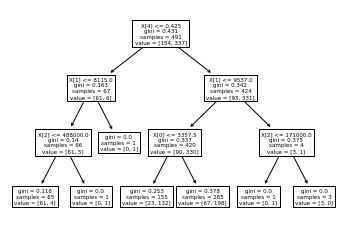

In [208]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
tree.plot_tree(tree_clf)